In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import re
from bs4 import BeautifulSoup
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
reviews_data = pd.read_csv('reviews-dataset.csv')

In [6]:
reviews_data

,review,sentiment
0,It reaches the minds and feelings of everyone ...,positive
1,This is another notorious Mexican horror film:...,negative
2,Skippy from Family Ties goes from clean-cut to...,positive
3,Unlike Terms of Endearment and Steel Magnolia'...,negative
4,I have seen most of the Tarzan episodes. Certa...,positive
...,...,...
39995,Others have harped here about James Stewart's ...,positive
39996,"Most likely ""Cleopatra 2525"" will be of little...",negative
39997,Jim Henson's Muppets were a favorite of mine s...,positive
39998,"I agree with ""johnlewis"", who said that there ...",positive


In [7]:
reviews_data.head()

,review,sentiment
0,It reaches the minds and feelings of everyone ...,positive
1,This is another notorious Mexican horror film:...,negative
2,Skippy from Family Ties goes from clean-cut to...,positive
3,Unlike Terms of Endearment and Steel Magnolia'...,negative
4,I have seen most of the Tarzan episodes. Certa...,positive


In [8]:
reviews_data.tail()

,review,sentiment
39995,Others have harped here about James Stewart's ...,positive
39996,"Most likely ""Cleopatra 2525"" will be of little...",negative
39997,Jim Henson's Muppets were a favorite of mine s...,positive
39998,"I agree with ""johnlewis"", who said that there ...",positive
39999,"Very few so called ""remakes"" can be as good as...",positive


In [9]:
reviews_data.sentiment.value_counts()

positive    20025
negative    19975
Name: sentiment, dtype: int64

#### I see that there are Forty thousand rows and two columns. One column name is labeled review which contains review/opinion of movie or movies. There is another column which is labeled sentiment which suggests that a particular review is positive or negative.

In [10]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [11]:
reviews_data.describe()

,review,sentiment
count,40000,40000
unique,39738,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,20025


In [12]:
len(set(reviews_data.review))

39738

In [13]:
len(reviews_data)

40000

In [14]:
duplicate_values = len(reviews_data) - len(set(reviews_data.review))
duplicate_values

262

#### There are no null values in review column and there are 262 duplicate reviews

### Dropping Duplicate values from review column

In [15]:
reviews_data.drop_duplicates(subset=['review'], inplace = True)

In [16]:
reviews_data.describe()

,review,sentiment
count,39738,39738
unique,39738,2
top,It reaches the minds and feelings of everyone ...,positive
freq,1,19953


In [17]:
reviews_data

,review,sentiment
0,It reaches the minds and feelings of everyone ...,positive
1,This is another notorious Mexican horror film:...,negative
2,Skippy from Family Ties goes from clean-cut to...,positive
3,Unlike Terms of Endearment and Steel Magnolia'...,negative
4,I have seen most of the Tarzan episodes. Certa...,positive
...,...,...
39995,Others have harped here about James Stewart's ...,positive
39996,"Most likely ""Cleopatra 2525"" will be of little...",negative
39997,Jim Henson's Muppets were a favorite of mine s...,positive
39998,"I agree with ""johnlewis"", who said that there ...",positive


### Plot Bar Graph

<AxesSubplot: xlabel='sentiment', ylabel='count'>

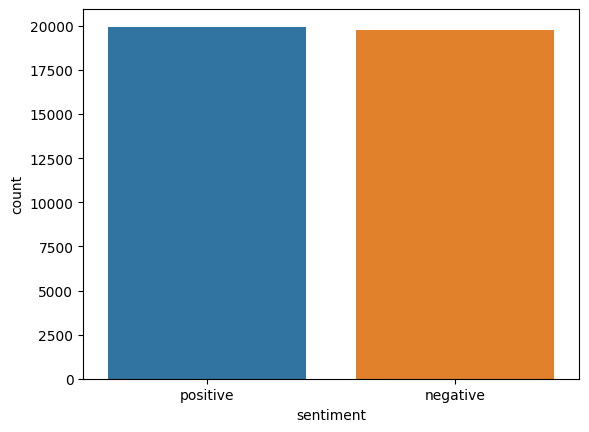

In [18]:
sns.countplot(x = reviews_data['sentiment'])

In [19]:
reviews_data.sentiment.value_counts()

positive    19953
negative    19785
Name: sentiment, dtype: int64

### There are 19953 positive reviews and 19785 negative reviews

## Seperate Positive and Negative reviews

In [20]:
reviews_data.loc[reviews_data['sentiment'] == 'positive'] 

,review,sentiment
0,It reaches the minds and feelings of everyone ...,positive
2,Skippy from Family Ties goes from clean-cut to...,positive
4,I have seen most of the Tarzan episodes. Certa...,positive
5,Tremendous fun both as a film and as an excuse...,positive
6,This zippy and fun short from 1916 - the time ...,positive
...,...,...
39991,A country-boy Aussie-Rules player (Mat) goes t...,positive
39995,Others have harped here about James Stewart's ...,positive
39997,Jim Henson's Muppets were a favorite of mine s...,positive
39998,"I agree with ""johnlewis"", who said that there ...",positive


In [21]:
reviews_data.loc[reviews_data['sentiment'] == 'positive'].review

0        It reaches the minds and feelings of everyone ...
2        Skippy from Family Ties goes from clean-cut to...
4        I have seen most of the Tarzan episodes. Certa...
5        Tremendous fun both as a film and as an excuse...
6        This zippy and fun short from 1916 - the time ...
                               ...                        
39991    A country-boy Aussie-Rules player (Mat) goes t...
39995    Others have harped here about James Stewart's ...
39997    Jim Henson's Muppets were a favorite of mine s...
39998    I agree with "johnlewis", who said that there ...
39999    Very few so called "remakes" can be as good as...
Name: review, Length: 19953, dtype: object

In [22]:
all_positive_text = ' '.join(reviews_data.loc[reviews_data['sentiment'] == 'positive'].review)

In [23]:
pos_list = all_positive_text.lower().split()
pos_count = collections.Counter(pos_list)
top_10_pos = pos_count.most_common(10)
top_10_pos

[('the', 261056),
 ('and', 137080),
 ('a', 128960),
 ('of', 120552),
 ('to', 103464),
 ('is', 87133),
 ('in', 76625),
 ('i', 53120),
 ('it', 51522),
 ('this', 51140)]

In [24]:
reviews_data.loc[reviews_data['sentiment'] == 'negative']

,review,sentiment
1,This is another notorious Mexican horror film:...,negative
3,Unlike Terms of Endearment and Steel Magnolia'...,negative
7,I rented this movie on DVD. I knew that the mo...,negative
9,"In order for a thriller to elicit fear, suspen...",negative
11,For the love of god please don't see this movi...,negative
...,...,...
39989,The Angry Red Planet (Quickie Review) <br /><b...,negative
39992,"I rented this movie, knowing that it would be ...",negative
39993,I just watched The Incredible Melting Man for ...,negative
39994,I was looking forward to this flick. Being an ...,negative


In [25]:
all_neg_text = ' '.join(reviews_data.loc[reviews_data['sentiment'] == 'negative'].review)

In [26]:
neg_list = all_neg_text.lower().split()
neg_count = collections.Counter(neg_list)
top_10_neg = neg_count.most_common(10)
top_10_neg

[('the', 247161),
 ('a', 123004),
 ('and', 112334),
 ('of', 107587),
 ('to', 106582),
 ('is', 75952),
 ('in', 66367),
 ('i', 59231),
 ('this', 58653),
 ('that', 52091)]

#### Right now not able to distinguish between positive and negative words as there are many stop words

## Separate Positive reviews by removing non words

In [27]:
## Convert words to lower case and split
pos_list = all_positive_text.lower().split()

# pattern = '<[^<]>+?'

## Beautiful Soup object
soup = BeautifulSoup(str(pos_list), 'html.parser')

## Remove HTML Tags
# non_HTML_pos = re.sub(pattern , " ", str(pos_list))
non_HTML_pos = soup.get_text()

## Remove non words
pos_data = re.sub(r'\W+', ' ', non_HTML_pos)



In [28]:
# Tokenize the text
tokens = word_tokenize(pos_data)

##Remove stop words
stop_words = set(stopwords.words('english'))
filtered_pos_data = [word for word in tokens if word.lower() not in stop_words]

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming
stemmed_words = [stemmer.stem(token) for token in filtered_pos_data]

# Lemmatization
lemmatized_words = [lemmatizer.lemmatize(token) for token in filtered_pos_data]


In [29]:
# pos_list = all_positive_text.lower().split()
# pos_count = collections.Counter(pos_list)
# top_10_pos = pos_count.most_common(10)
# top_10_pos

pos_count_lemma = collections.Counter(lemmatized_words)
top_10_pos = pos_count_lemma.most_common(10)
top_10_pos

[('film', 39815),
 ('movie', 35597),
 ('one', 22573),
 ('like', 14511),
 ('time', 13001),
 ('good', 12029),
 ('character', 11320),
 ('story', 11226),
 ('great', 10455),
 ('see', 10300)]

In [30]:
pos_10_df = pd.DataFrame(top_10_pos)
pos_10_df.rename(columns={0:'word', 1:'frequency'}, inplace = True)
pos_10_df

,word,frequency
0,film,39815
1,movie,35597
2,one,22573
3,like,14511
4,time,13001
5,good,12029
6,character,11320
7,story,11226
8,great,10455
9,see,10300


#### Words like good, great tell us that the reviews might be positive

## Separate Negative reviews by removing non words

In [31]:
## Convert words to lower case and split
neg_list = all_neg_text.lower().split()

# pattern = '<[^<]>+?'

## Beautiful Soup object
soup = BeautifulSoup(str(neg_list), 'html.parser')

## Remove HTML Tags
# non_HTML_pos = re.sub(pattern , " ", str(pos_list))
non_HTML_neg = soup.get_text()

## Remove non words
neg_data = re.sub(r'\W+', ' ', non_HTML_neg)



In [32]:
# Tokenize the text
tokens = word_tokenize(neg_data)

##Remove stop words
stop_words = set(stopwords.words('english'))
filtered_neg_data = [word for word in tokens if word.lower() not in stop_words]

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming
stemmed_neg_words = [stemmer.stem(token) for token in filtered_neg_data]

# Lemmatization
lemmatized_neg_words = [lemmatizer.lemmatize(token) for token in filtered_neg_data]


In [33]:
neg_count_lemma = collections.Counter(lemmatized_neg_words)
top_10_neg = neg_count_lemma.most_common(10)
neg_10_df = pd.DataFrame(top_10_neg)
neg_10_df.rename(columns={0: 'word', 1:'frequency'},inplace= True)
neg_10_df

,word,frequency
0,movie,46154
1,film,34572
2,one,21467
3,like,18076
4,even,12105
5,time,11918
6,good,11771
7,bad,11753
8,character,11353
9,would,11038


#### Word "bad" tell us it is negative but there is word "good" as well, so cannot completely say that they are negative by looking at top 10 negative words

### Bar Graph

In [34]:
counts_pos = pos_10_df['frequency']

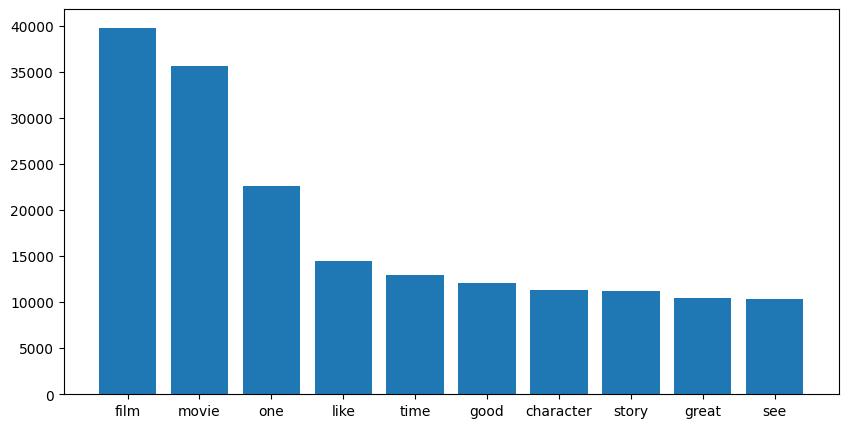

In [35]:
fig = plt.figure(figsize = (10,5))

plt.bar(pos_10_df['word'], counts_pos.values)
plt.show()

In [36]:
# fig = plt.figure(figsize = (10,5))

# plt.bar(pos_10_df['word'], counts.values)
# plt.show()

In [37]:
counts_neg = neg_10_df['frequency']

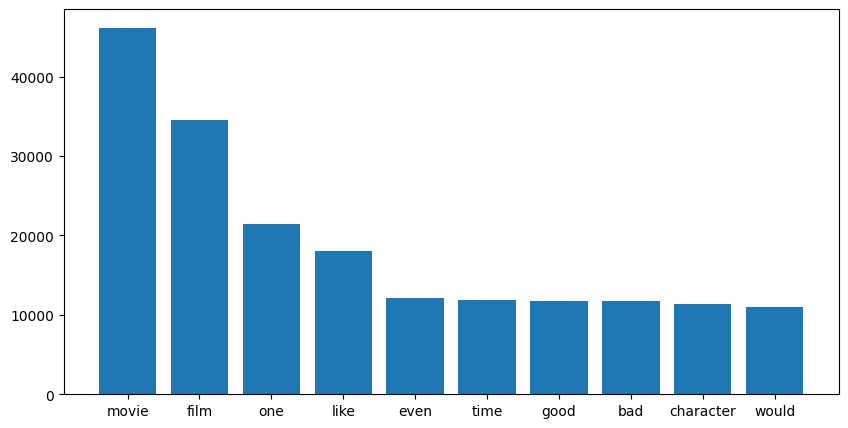

In [38]:
fig = plt.figure(figsize = (10,5))

plt.bar(neg_10_df['word'], counts_neg.values)
plt.show()

In [39]:
# ## Remove HTML Tags
# # import re
# # from sklearn.feature_extraction.text import CountVectorizer
# # from gensim.parsing.preprocessing import remove_stopwords

# pattern = '<[^<]>+?'
# for i, value in reviews_data.review.iteritems():
#     ## Remove HTML Tags
#     non_HTML_data = re.sub(pattern , " ", str(value))
#     ## Remove non words
#     data = re.sub("[^a-zA-Z]"," ", non_HTML_data)
#     ## Convert words to lower case and split
#     data = data.lower().split()
#     data_string = " ".join(data) ## Convert list to string
#     ##Remove stop words
#     filtered_data = remove_stopwords(data_string)
#     reviews_data.at[i, 'Common_Words'] = filtered_data

### Extract common words

In [40]:
reviews_data['Cleaned_Reviews'] = None

In [41]:
## Remove HTML Tags

stop_words = set(stopwords.words('english'))

## Initalize lemmatizer
lemmatizer = WordNetLemmatizer()

# pattern = '<[^<]>+?'
for i, value in reviews_data.review.iteritems():
    
    ## Convert words to lower case and split
    review_list = value.lower().split()

    ##Beautiful Soup Object
    soup = BeautifulSoup(str(review_list), 'html.parser')

    ##Remove HTML tags
    non_HTML_review = soup.get_text()

    ##Remove non words
    review_data = re.sub(r'\W+', ' ',non_HTML_review)

    ## Tokenize the text 
    tokens = word_tokenize(review_data)

    ##Remove stop words
    filtered_review_data = [word for word in tokens if word.lower() not in stop_words]

    ##Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(token) for token in filtered_review_data]

    ##Store in the dataframe
    reviews_data.at[i, 'Cleaned_Reviews'] = lemmatized_words
    
#     ## Remove HTML Tags
#     non_HTML_data = re.sub(pattern , " ", str(value))
#     ## Remove non words
#     data = re.sub("[^a-zA-Z]"," ", non_HTML_data)
#     ## Convert words to lower case and split
#     data = data.lower().split()
#     data_string = " ".join(data) ## Convert list to string
#     ##Remove stop words
#     filtered_data = remove_stopwords(data_string)
#     reviews_data.at[i, 'Common_Words'] = filtered_data

/var/folders/k9/lb01bjlx50d4h_fh2nrld7sc0000gn/T/ipykernel_1481/2077971532.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in reviews_data.review.iteritems():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [42]:
# x = re.sub(r'\W+', ' ',non_HTML_review)
# x

In [43]:
reviews_data


,review,sentiment,Cleaned_Reviews
0,It reaches the minds and feelings of everyone ...,positive,"[reach, mind, feeling, everyone, driving, deep..."
1,This is another notorious Mexican horror film:...,negative,"[another, notorious, mexican, horror, film, ho..."
2,Skippy from Family Ties goes from clean-cut to...,positive,"[skippy, family, tie, go, clean, cut, metal, k..."
3,Unlike Terms of Endearment and Steel Magnolia'...,negative,"[unlike, term, endearment, steel, magnolia, le..."
4,I have seen most of the Tarzan episodes. Certa...,positive,"[seen, tarzan, episode, certainly, rated, x, k..."
...,...,...,...
39995,Others have harped here about James Stewart's ...,positive,"[others, harped, james, stewart, age, playing,..."
39996,"Most likely ""Cleopatra 2525"" will be of little...",negative,"[likely, cleopatra, 2525, little, interest, wa..."
39997,Jim Henson's Muppets were a favorite of mine s...,positive,"[jim, henson, muppets, favorite, mine, since, ..."
39998,"I agree with ""johnlewis"", who said that there ...",positive,"[agree, johnlewis, said, lot, going, line, fil..."


In [44]:
for i, value in reviews_data.Cleaned_Reviews.iteritems():
    reviews_data.at[i, 'Cleaned_Reviews'] = ' '.join(reviews_data.Cleaned_Reviews[i])

/var/folders/k9/lb01bjlx50d4h_fh2nrld7sc0000gn/T/ipykernel_1481/1126496771.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in reviews_data.Cleaned_Reviews.iteritems():


In [45]:
reviews_data

,review,sentiment,Cleaned_Reviews
0,It reaches the minds and feelings of everyone ...,positive,reach mind feeling everyone driving deep black...
1,This is another notorious Mexican horror film:...,negative,another notorious mexican horror film however ...
2,Skippy from Family Ties goes from clean-cut to...,positive,skippy family tie go clean cut metal kid fairl...
3,Unlike Terms of Endearment and Steel Magnolia'...,negative,unlike term endearment steel magnolia left mov...
4,I have seen most of the Tarzan episodes. Certa...,positive,seen tarzan episode certainly rated x keeffe b...
...,...,...,...
39995,Others have harped here about James Stewart's ...,positive,others harped james stewart age playing lindbu...
39996,"Most likely ""Cleopatra 2525"" will be of little...",negative,likely cleopatra 2525 little interest watch se...
39997,Jim Henson's Muppets were a favorite of mine s...,positive,jim henson muppets favorite mine since childho...
39998,"I agree with ""johnlewis"", who said that there ...",positive,agree johnlewis said lot going line film think...


In [46]:
features = reviews_data.iloc[:, 2]
features

0        reach mind feeling everyone driving deep black...
1        another notorious mexican horror film however ...
2        skippy family tie go clean cut metal kid fairl...
3        unlike term endearment steel magnolia left mov...
4        seen tarzan episode certainly rated x keeffe b...
                               ...                        
39995    others harped james stewart age playing lindbu...
39996    likely cleopatra 2525 little interest watch se...
39997    jim henson muppets favorite mine since childho...
39998    agree johnlewis said lot going line film think...
39999    called remake good original one cross border f...
Name: Cleaned_Reviews, Length: 39738, dtype: object

In [47]:
reviews_data

,review,sentiment,Cleaned_Reviews
0,It reaches the minds and feelings of everyone ...,positive,reach mind feeling everyone driving deep black...
1,This is another notorious Mexican horror film:...,negative,another notorious mexican horror film however ...
2,Skippy from Family Ties goes from clean-cut to...,positive,skippy family tie go clean cut metal kid fairl...
3,Unlike Terms of Endearment and Steel Magnolia'...,negative,unlike term endearment steel magnolia left mov...
4,I have seen most of the Tarzan episodes. Certa...,positive,seen tarzan episode certainly rated x keeffe b...
...,...,...,...
39995,Others have harped here about James Stewart's ...,positive,others harped james stewart age playing lindbu...
39996,"Most likely ""Cleopatra 2525"" will be of little...",negative,likely cleopatra 2525 little interest watch se...
39997,Jim Henson's Muppets were a favorite of mine s...,positive,jim henson muppets favorite mine since childho...
39998,"I agree with ""johnlewis"", who said that there ...",positive,agree johnlewis said lot going line film think...


In [48]:
le = LabelEncoder()
le.fit(reviews_data.sentiment)
reviews_data.sentiment = le.transform(reviews_data.sentiment)
reviews_data

,review,sentiment,Cleaned_Reviews
0,It reaches the minds and feelings of everyone ...,1,reach mind feeling everyone driving deep black...
1,This is another notorious Mexican horror film:...,0,another notorious mexican horror film however ...
2,Skippy from Family Ties goes from clean-cut to...,1,skippy family tie go clean cut metal kid fairl...
3,Unlike Terms of Endearment and Steel Magnolia'...,0,unlike term endearment steel magnolia left mov...
4,I have seen most of the Tarzan episodes. Certa...,1,seen tarzan episode certainly rated x keeffe b...
...,...,...,...
39995,Others have harped here about James Stewart's ...,1,others harped james stewart age playing lindbu...
39996,"Most likely ""Cleopatra 2525"" will be of little...",0,likely cleopatra 2525 little interest watch se...
39997,Jim Henson's Muppets were a favorite of mine s...,1,jim henson muppets favorite mine since childho...
39998,"I agree with ""johnlewis"", who said that there ...",1,agree johnlewis said lot going line film think...


In [49]:
features = reviews_data.iloc[:, 2]
target = reviews_data.iloc[:, 1]

In [50]:
features

0        reach mind feeling everyone driving deep black...
1        another notorious mexican horror film however ...
2        skippy family tie go clean cut metal kid fairl...
3        unlike term endearment steel magnolia left mov...
4        seen tarzan episode certainly rated x keeffe b...
                               ...                        
39995    others harped james stewart age playing lindbu...
39996    likely cleopatra 2525 little interest watch se...
39997    jim henson muppets favorite mine since childho...
39998    agree johnlewis said lot going line film think...
39999    called remake good original one cross border f...
Name: Cleaned_Reviews, Length: 39738, dtype: object

In [51]:
target

0        1
1        0
2        1
3        0
4        1
        ..
39995    1
39996    0
39997    1
39998    1
39999    1
Name: sentiment, Length: 39738, dtype: int64

In [52]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(features)

## Train Test Split

In [53]:
train_x, test_x, train_y, test_y = train_test_split(X, target, test_size = 0.2, random_state = 42)

## Create a model using Logistic Regression

In [54]:
logr = LogisticRegression()
logr.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
hyp = logr.predict(test_x)
accuracy_score(test_y, hyp)

0.8861348766985405

In [56]:
confusion_matrix(test_y, hyp)

array([[3435,  430],
       [ 475, 3608]])

In [57]:
logr.classes_

array([0, 1])

In [58]:
le.inverse_transform([0,1])

array(['negative', 'positive'], dtype=object)

### The confusion matrix states that True Negatives are 3435 that is the model has correctly predicted the correct negative values. False Positive values are 430 which means that actually the sentiment was negative but it predicted as positive. False negative values are 475 which means that actual sentiment is positive but the model predicted it as negative. True Positive values are 3608 which means that sentiment was actually positive and the model also predicted it as positive

### Vanilla Logistic Regression

In [59]:
parameters = { 'C': [0.1, 1]}
logistic = LogisticRegression(solver='liblinear')
clf = GridSearchCV(logistic, parameters, cv=10)
clf.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1]})

In [60]:
clf.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [56]:
# parameters = {'penalty': ['11', '12'],
#              'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
# logistic = LogisticRegression(solver='liblinear')
# grid_search = GridSearchCV(logistic, parameters, cv=10)
# grid_search.fit(train_x, train_y)

parameters = {'penalty': ['l1', 'l2'],
             'C': [0.1, 1]}
logistic = LogisticRegression(solver='liblinear')
clf = GridSearchCV(logistic, parameters, cv=10)
clf.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1], 'penalty': ['l1', 'l2']})

In [57]:
clf.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [58]:
logr = LogisticRegression(C=0.1)
logr.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [59]:
hyp = logr.predict(test_x)
accuracy_score(test_y, hyp)

0.8891545042778057

### GridSearch CV on Ridge and Lasso

In [60]:
ridge = Ridge(alpha=10)
ridge.fit(train_x, train_y)
np.sqrt(mean_squared_error(test_y, ridge.predict(test_x)))

0.40705919237363414

In [61]:
lasso = Lasso(alpha=10)
lasso.fit(train_x, train_y)
np.sqrt(mean_squared_error(test_y, lasso.predict(test_x)))

0.5000221878488963

In [62]:
params = {'alpha': [1, 10]}
ridge = Ridge()
reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
reg.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 10]},
             scoring='neg_mean_squared_error')

In [63]:
reg.best_params_

{'alpha': 10}

In [64]:
params = {'alpha': [1, 10]}
lasso = Lasso()
reg = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
reg.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [1, 10]},
             scoring='neg_mean_squared_error')

In [65]:
reg.best_params_

{'alpha': 1}

In [66]:
lasso = Lasso(alpha=1)
lasso.fit(train_x, train_y)
np.sqrt(mean_squared_error(test_y, lasso.predict(test_x)))

0.5000221878488963

In [67]:
log_ridge = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.1)
log_ridge.fit(train_x, train_y)
accuracy_score(test_y, log_ridge.predict(test_x))

0.8894061399094112

In [68]:
log_lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.1)
log_lasso.fit(train_x, train_y)
accuracy_score(test_y, log_lasso.predict(test_x))

0.8803472571716155

## Gaussian Naive Bayes

In [69]:
train_x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [70]:
gnb = GaussianNB()
gnb.fit(train_x.toarray(), train_y)
gnb_hyp = gnb.predict(test_x.toarray())

In [71]:
accuracy_score(test_y, gnb_hyp)

0.6410417715148465

In [72]:
confusion_matrix(test_y, gnb_hyp)

array([[3201,  664],
       [2189, 1894]])

In [73]:
print(classification_report(test_y, gnb_hyp))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69      3865
           1       0.74      0.46      0.57      4083

    accuracy                           0.64      7948
   macro avg       0.67      0.65      0.63      7948
weighted avg       0.67      0.64      0.63      7948



In [74]:
# gnb = GaussianNB()
# gnb.fit(train_x.toarray(), train_y)
# hyp = gnb.predict(test_x.toarray())

# gnb = GaussianNB()
# gnb.fit(train_x.toarray(), train_y)
# hyp = gnb.predict(test_x.toarray())

In [61]:
reviews_data.sentiment.value_counts()

1    19953
0    19785
Name: sentiment, dtype: int64

### I think SMOTE or the NearMiss will not have much of an impact on this data set as SMOTE is useful when there is imbalance in data. In this case the data is distributed, as seen above 

### I think there either might be slight increase or same results in the accuracy and in the confusion matrix as well

## Random Forest

In [75]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_hyp = rf.predict(test_x)
accuracy_score(test_y, rf_hyp)

0.8537996980372421

In [76]:
params = {'max_depth': [8, 9, 10],
          'criterion': ['entropy', 'gini'],
          'n_estimators': [190, 220, 250]}

folds = 5
# rf = RandomForestClassifier()
clf = GridSearchCV(rf, params, cv=folds)
clf.fit(train_x, train_y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 220}

In [77]:
accuracy_score(test_y, clf.predict(test_x))

0.8459989934574735

In [79]:
rf = RandomForestClassifier(n_estimators = 220, max_depth=10, criterion = 'gini')
rf.fit(train_x, train_y)
rf_hyp = rf.predict(test_x)
accuracy_score(test_y, rf_hyp)

0.8520382486160041

## Logistic Regression is the best algorithm among all other algorithm as it gives the best accuracy score of around 88%. Random Forest also performs well with an accuracy of around 85 percent. Gaussian Naive Bayes give an accuracy of around 64%.  

## Logistic Regression is the less complex model among the 3 models as it is a simple linear model which uses logistic function